# Annotate Pictures with SmolVLM and Docling

This notebook loads an example PDF and runs Docling's PDF pipeline with SmolVLM-based picture description, and displays the first few images with their captions and AI-generated annotations.

## Setup

Install Docling with VLM support and ipython:

In [1]:
%pip install -q docling[vlm] ipython
# Restart the kernel if needed to pick up updated packages

zsh:1: no matches found: docling[vlm]
Note: you may need to restart the kernel to use updated packages.


## Configure PDF pipeline for SmolVLM annotation

In [2]:
from pathlib import Path
from docling.datamodel.pipeline_options import PdfPipelineOptions, smolvlm_picture_description
from docling.datamodel.base_models import InputFormat
from docling.document_converter import DocumentConverter, PdfFormatOption

# Pipeline options
pipeline_opts = PdfPipelineOptions()
pipeline_opts.do_picture_description = True
pipeline_opts.picture_description_options = smolvlm_picture_description
pipeline_opts.picture_description_options.prompt = (
    'Describe the image in three sentences. Be concise and accurate.'
)
pipeline_opts.images_scale = 2.0
pipeline_opts.generate_picture_images = True

# Prepare converter
converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_opts)
    }
)

# Convert the PDF
pdf_path = Path('tests/AR_2020_WEB2.pdf')
doc = converter.convert(source=pdf_path).document


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Display Annotated Pictures

Show the first 5 images with captions and SmolVLM annotations:


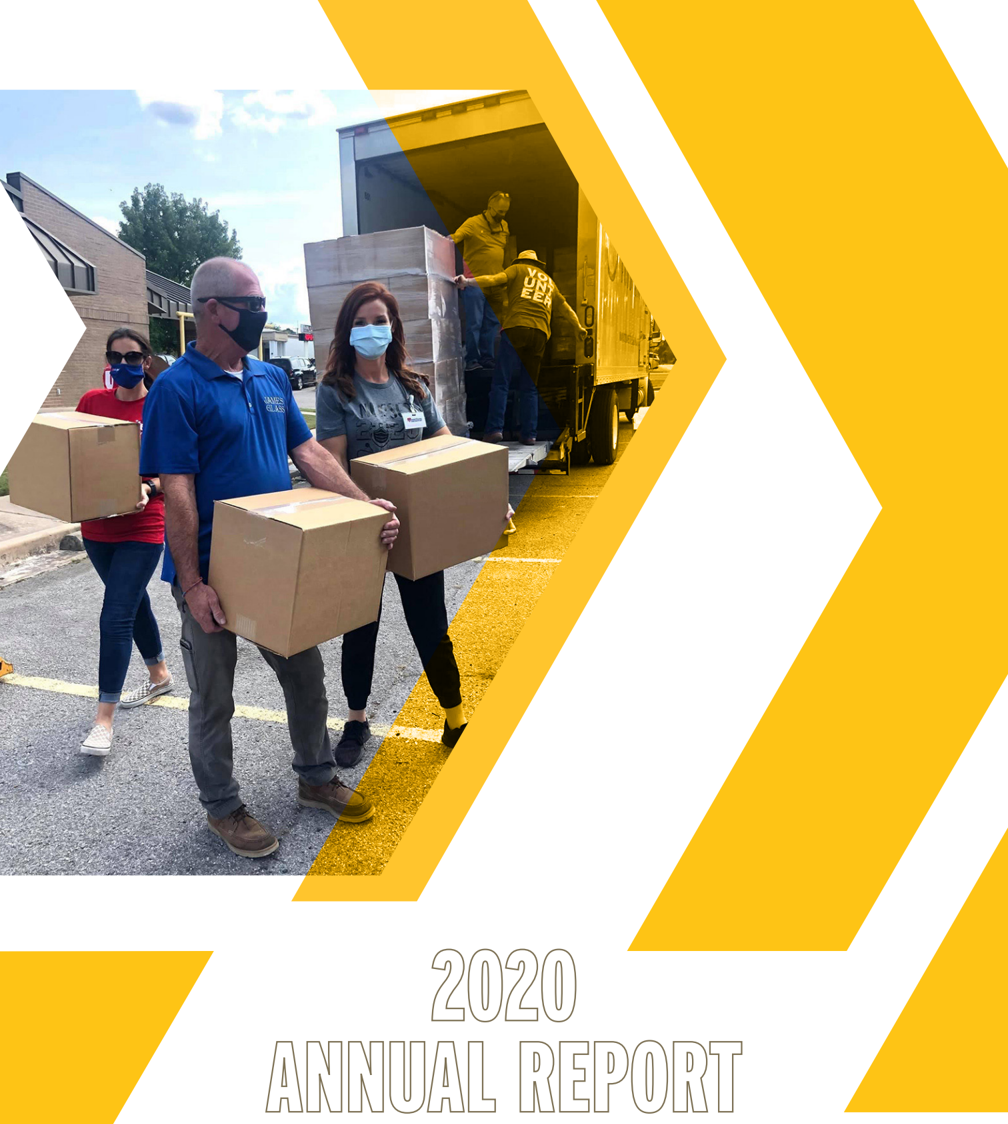
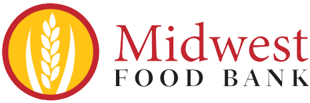
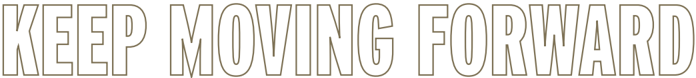
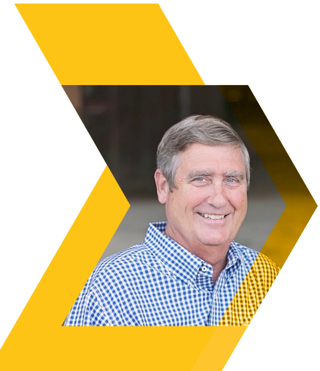
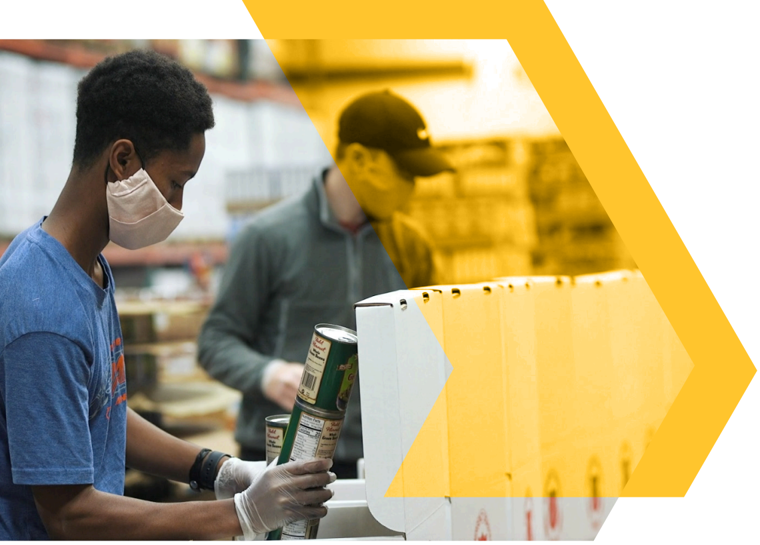

In [3]:
from docling_core.types.doc.document import PictureDescriptionData
from IPython.display import HTML, display

html_items = []
for pic in doc.pictures[:5]:
    item = f"<h3>Picture <code>{pic.self_ref}</code></h3>"
    item += f'<img src="{pic.image.uri}" /><br/>'
    item += f"<h4>Caption</h4>{pic.caption_text(doc=doc)}<br/>"
    for ann in pic.annotations:
        if not isinstance(ann, PictureDescriptionData):
            continue
        item += (
            f"<h4>Annotations ({ann.provenance})</h4>"
            f"{ann.text}<br/>"
        )
    html_items.append(item)
display(HTML('<hr/>'.join(html_items)))